https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb

In [ ]:
%cd "/content/drive/MyDrive/zindi/zndi_smart_money"

/content/drive/MyDrive/zindi/zndi_smart_money


In [ ]:
import pandas as pd

In [ ]:
DF = pd.concat([
    pd.read_csv(path+'/'+'Train.csv').assign(Tr=1),
    pd.read_csv(path+'/'+'Test.csv').assign(Tr=0)
    ])

In [ ]:
SampleSubmission=pd.read_csv("/content/drive/MyDrive/zindi/zndi_smart_money/SampleSubmission.csv")
SampleSubmission

In [ ]:
DF

In [ ]:
train.PURCHASED_AT.value_counts()

2021-11-18 11:02:00+00    2
2021-08-24 14:53:00+00    2
2021-08-04 15:03:00+00    2
2021-01-15 15:40:00+00    2
2021-10-22 15:49:00+00    2
                         ..
2022-01-14 22:05:00+00    1
2022-04-08 12:38:00+00    1
2021-12-09 11:25:00+00    1
2021-11-05 08:31:00+00    1
2022-03-22 04:06:00+00    1
Name: PURCHASED_AT, Length: 365, dtype: int64

In [ ]:
train[train.PURCHASED_AT=='2021-11-18 11:02:00+00']

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
186,2022-03-16 13:08:19.703288+00,TOTAL K STATE HOUSE 1,Transport & Fuel,300,2021-11-18 11:02:00+00,False,NaN,Female,1,85000,ID_1I8XYBWK,ID_iabzbcw4
347,2022-03-16 13:05:51.851102+00,TOTAL K STATE HOUSE 1,Groceries,300,2021-11-18 11:02:00+00,False,NaN,Female,1,85000,ID_1I8XYBWK,ID_xnrwzo61


In [ ]:
train[train.PURCHASED_AT=='2021-10-22 15:49:00+00']

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
65,2021-10-05 12:45:58.000193+00,BRIOCHE RUBIS LANGATA,Going out,500,2021-10-22 15:49:00+00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_73pi4suu
78,2022-03-16 13:08:19.703288+00,MYAIRTIME LIMITED,Data & WiFi,50,2021-10-22 15:49:00+00,True,NaN,Female,1,85000,ID_1I8XYBWK,ID_86d83ph2


In [ ]:
train[train.PURCHASED_AT=='2021-08-24 14:53:00+00']

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
85,2021-08-06 11:28:03.855344+00,MIKE KOECH,Groceries,130,2021-08-24 14:53:00+00,True,27.0,Female,2,8000,ID_L8QMYB09,ID_8xyhwvvf
335,2021-11-03 14:49:24.05659+00,MIKE KOECH,Groceries,130,2021-08-24 14:53:00+00,True,27.0,Female,2,8000,ID_L8QMYB09,ID_whbkraxr


In [ ]:
train.PURCHASED_AT.unique()

365

In [ ]:
curr

,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Tr
357,MZIZI NETWORKS,NaN,800,2022-03-31 07:34:00+00,False,NaN,Female,1,250000,ID_OZANC6XT,0
296,MZIZI NETWORKS,NaN,800,2022-03-31 07:34:00+00,False,NaN,Female,1,250000,ID_OZANC6XT,0


In [ ]:
path = '/content/drive/MyDrive/zindi/zndi_smart_money'
DF = pd.concat([
    pd.read_csv(path+'/'+'Train.csv').assign(Tr=1),
    pd.read_csv(path+'/'+'Test.csv').assign(Tr=0)
    ])
cols = ['MERCHANT_NAME', 'PURCHASE_VALUE', 'PURCHASED_AT', 'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY', 'USER_AGE', 'USER_GENDER', 'USER_HOUSEHOLD', 'USER_INCOME', 'USER_ID']
DUP = DF[DF.duplicated(cols, keep=False)].drop(columns=['MERCHANT_CATEGORIZED_AT', 'Transaction_ID']).sort_values(by=['PURCHASED_AT'])
for pur_time in DUP['PURCHASED_AT'].unique():
    ts_index = []
    real_val = None
    curr = DUP[DUP.PURCHASED_AT == pur_time]
    for i in curr.index:
        if curr.loc[i]['Tr']: # if train
            real_val = curr.loc[i]['MERCHANT_CATEGORIZED_AS']
        else:
            ts_index.append(i)
    if real_val:
         for inx in ts_index:
             for col in SampleSubmission.columns[1:]:
                 if col == real_val:
                     SampleSubmission.loc[inx, col] = 1 # set the category to 1 if it is found in training set
                 else:
                     SampleSubmission.loc[inx, col] = 0

In [ ]:
DUP

,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Tr
239,TUSKYS -CHAP CHAP THIGIRI,NaN,3486,2018-12-05 09:36:00+00,False,NaN,Female,1,10000,ID_40L9OTIM,0
245,TUSKYS -CHAP CHAP THIGIRI,Going out,3486,2018-12-05 09:36:00+00,False,NaN,Female,1,10000,ID_40L9OTIM,1
356,JIMMIE WAIRIMU,Bills & Fees,40000,2019-03-11 05:38:00+00,True,NaN,Female,1,10000,ID_40L9OTIM,1
188,JIMMIE WAIRIMU,Bills & Fees,40000,2019-03-11 05:38:00+00,True,NaN,Female,1,10000,ID_40L9OTIM,1
362,PETER NJOORA KENDA,NaN,300,2019-05-31 13:49:00+00,True,NaN,Female,1,85000,ID_1I8XYBWK,0
...,...,...,...,...,...,...,...,...,...,...,...
186,TOTAL K STATE HOUSE 1,Transport & Fuel,300,2021-11-18 11:02:00+00,False,NaN,Female,1,85000,ID_1I8XYBWK,1
30,TOTAL K STATE HOUSE 1,NaN,300,2021-11-18 11:02:00+00,False,NaN,Female,1,85000,ID_1I8XYBWK,0
347,TOTAL K STATE HOUSE 1,Groceries,300,2021-11-18 11:02:00+00,False,NaN,Female,1,85000,ID_1I8XYBWK,1
357,MZIZI NETWORKS,NaN,800,2022-03-31 07:34:00+00,False,NaN,Female,1,250000,ID_OZANC6XT,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!unzip "/content/drive/MyDrive/zindi/alvin-smart-money-management-classification-challenge.zip"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from lightgbm import LGBMRegressor
import xgboost as xgb
import datetime
from sklearn.preprocessing import LabelEncoder

In [ ]:
train= pd.read_csv("/content/drive/MyDrive/zindi/zndi_smart_money/Train.csv")
test=pd.read_csv("/content/drive/MyDrive/zindi/zndi_smart_money/Test.csv")
var=pd.read_csv('/content/drive/MyDrive/zindi/zndi_smart_money/VariableDefinitions.csv')
ex_data=pd.read_csv('/content/drive/MyDrive/zindi/zndi_smart_money/extra_data.csv')
SampleSubmission=pd.read_csv("/content/drive/MyDrive/zindi/zndi_smart_money/SampleSubmission.csv")

In [ ]:
train.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa
1,2021-10-25 16:18:38.586837+00,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_04xkfb07
2,2022-05-20 14:17:30.917297+00,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,2022-05-27 12:46:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_051urwuw
3,2022-04-12 15:59:14.139347+00,ZILLIONS CREDIT LIMITED,Loan Repayment,3800,2022-02-07 12:16:00+00,False,NaN,Male,5,252000,ID_3JA0MAFB,ID_0e1om7rz
4,2022-05-04 10:24:26.709045+00,MICHAEL MUSEMBI,Bills & Fees,60,2022-05-04 15:28:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0kfcoawb


In [ ]:
from pandas import option_context

with option_context('display.max_colwidth', 400):
    display(var)

,COLUMN_NAME,COLUMN_DEFINATION
0,MERCHANT_CATEGORIZED_AT,The time the merchant was categorized by the customer
1,MERCHANT_NAME,The name of the merchant
2,MERCHANT_CATEGORIZED_AS,The category the merchant was assigned by the customer
3,PURCHASE_VALUE,The value of the purchase made by the customer
4,PURCHASED_AT,The time the purchase was made
5,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,If true indicates that the merchant is not a registered business name
6,USER_EMAIL,The email of the customer
7,USER_AGE,The age of the customer
8,USER_GENDER,The gender of the customer
9,USER_HOUSEHOLD,The number of family members


In [ ]:
ex_data.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,NaN,MARK NYABAYO,NaN,20,2021-03-22 12:37:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_v13grrw3
1,NaN,ACCESS AFYA,NaN,1,2021-07-05 11:07:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_rgne8ij5
2,NaN,POA,NaN,1500,2021-06-21 19:40:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_4i2b28b6
3,NaN,POA,NaN,1500,2021-04-22 18:41:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_6dvi32yc
4,NaN,ACCESS AFYA,NaN,1,2021-07-29 13:03:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_sfk1yxbm


In [ ]:
ex_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MERCHANT_CATEGORIZED_AT                0 non-null      float64
 1   MERCHANT_NAME                          10000 non-null  object 
 2   MERCHANT_CATEGORIZED_AS                0 non-null      float64
 3   PURCHASE_VALUE                         10000 non-null  int64  
 4   PURCHASED_AT                           10000 non-null  object 
 5   IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY  10000 non-null  bool   
 6   USER_AGE                               1158 non-null   float64
 7   USER_GENDER                            9966 non-null   object 
 8   USER_HOUSEHOLD                         10000 non-null  int64  
 9   USER_INCOME                            10000 non-null  int64  
 10  USER_ID                                10000 non-null  object 
 11  Tra

In [ ]:
ex_data.USER_AGE.unique()

array([nan, 25., 27., 32., 26., 31., 23.])

In [ ]:
test.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,2022-06-01 10:25:16.7131+00,KCB PAYBILL AC,150000,2022-05-05 08:29:00+00,True,NaN,Male,5,150000,ID_O8P8YS18,ID_00x9h2yx
1,2022-03-16 13:05:51.851102+00,IPAY LTD,7394,2019-10-05 16:02:00+00,False,NaN,Female,1,10000,ID_40L9OTIM,ID_01db594f
2,2022-03-10 18:25:42.112294+00,JOHN NJIRU GAKUNJU,200,2021-11-25 09:56:00+00,False,NaN,Female,1,85000,ID_1I8XYBWK,ID_07pm99no
3,2022-04-12 15:59:14.139347+00,UONSDA CHURCH OFFERING-MAIN,50,2022-04-11 14:48:00+00,False,NaN,Male,2,10000,ID_GR569FUO,ID_09jryhkd
4,2022-05-04 10:24:26.709045+00,M-SHWARI LOCK SAVINGS,10000,2022-05-04 13:59:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0ccv924c


# eda

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MERCHANT_CATEGORIZED_AT                373 non-null    object 
 1   MERCHANT_NAME                          373 non-null    object 
 2   MERCHANT_CATEGORIZED_AS                373 non-null    object 
 3   PURCHASE_VALUE                         373 non-null    int64  
 4   PURCHASED_AT                           373 non-null    object 
 5   IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY  373 non-null    bool   
 6   USER_AGE                               61 non-null     float64
 7   USER_GENDER                            367 non-null    object 
 8   USER_HOUSEHOLD                         373 non-null    int64  
 9   USER_INCOME                            373 non-null    int64  
 10  USER_ID                                373 non-null    object 
 11  Transa

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MERCHANT_CATEGORIZED_AT                558 non-null    object 
 1   MERCHANT_NAME                          558 non-null    object 
 2   PURCHASE_VALUE                         558 non-null    int64  
 3   PURCHASED_AT                           558 non-null    object 
 4   IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY  558 non-null    bool   
 5   USER_AGE                               85 non-null     float64
 6   USER_GENDER                            553 non-null    object 
 7   USER_HOUSEHOLD                         558 non-null    int64  
 8   USER_INCOME                            558 non-null    int64  
 9   USER_ID                                558 non-null    object 
 10  Transaction_ID                         558 non-null    object 
dtypes: boo

In [ ]:
test.nunique()

MERCHANT_CATEGORIZED_AT                   57
MERCHANT_NAME                            314
PURCHASE_VALUE                           213
PURCHASED_AT                             535
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      2
USER_AGE                                   5
USER_GENDER                                2
USER_HOUSEHOLD                             9
USER_INCOME                               17
USER_ID                                   30
Transaction_ID                           558
dtype: int64

In [ ]:
train.nunique()

MERCHANT_CATEGORIZED_AT                   58
MERCHANT_NAME                            218
MERCHANT_CATEGORIZED_AS                   13
PURCHASE_VALUE                           150
PURCHASED_AT                             365
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      2
USER_AGE                                   4
USER_GENDER                                2
USER_HOUSEHOLD                             7
USER_INCOME                               15
USER_ID                                   25
Transaction_ID                           373
dtype: int64

False    203
True     170
Name: IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY, dtype: int64 



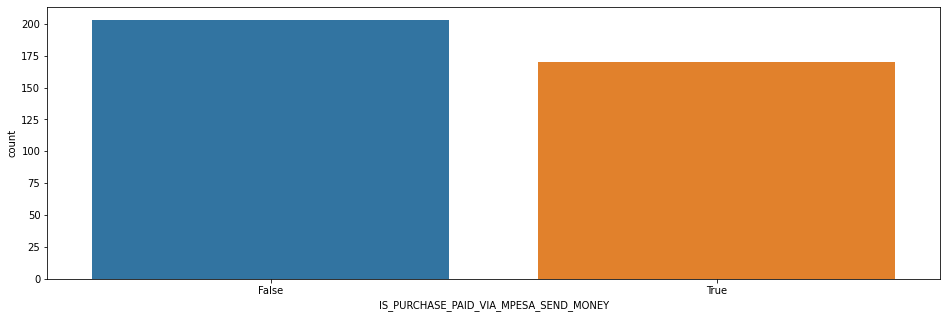

In [ ]:
print(train["IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY"].value_counts(),"\n")
plt.figure(figsize=(16,5))
sns.countplot(x = train["IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY"])
plt.show()

Bills & Fees        78
Groceries           50
Data & WiFi         43
Miscellaneous       43
Family & Friends    41
Going out           41
Transport & Fuel    29
Shopping            21
Emergency fund      12
Health               6
Loan Repayment       5
Rent / Mortgage      2
Education            2
Name: MERCHANT_CATEGORIZED_AS, dtype: int64 



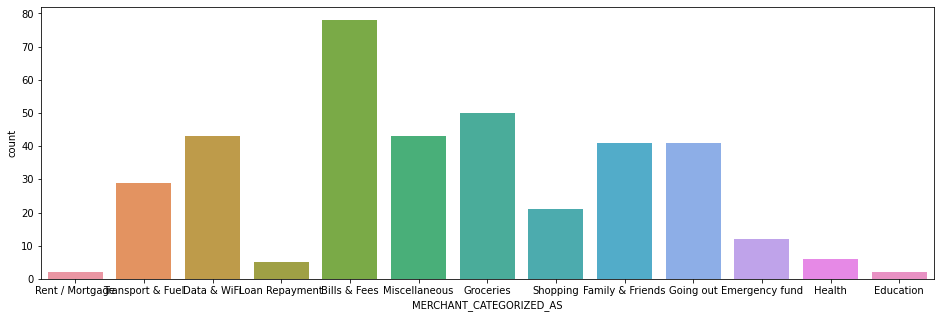

In [ ]:
print(train["MERCHANT_CATEGORIZED_AS"].value_counts(),"\n")
plt.figure(figsize=(16,5))
sns.countplot(x = train["MERCHANT_CATEGORIZED_AS"])
plt.show()

In [ ]:
k=train.groupby(['MERCHANT_NAME','MERCHANT_CATEGORIZED_AS'])['MERCHANT_CATEGORIZED_AS'].agg(['count'])
k

,,count
MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,
AGGREY MWANGALE,Bills & Fees,1
ALBERT MBOGO,Groceries,2
ALCHEMIIST - LEGEND BAR,Going out,1
APS ABC PARKING,Transport & Fuel,1
ARNELLE OMONDI,Family & Friends,1
...,...,...
WANZA SEKETA,Bills & Fees,1
WINTA WOLDEGABRIEL +254795225400,Groceries,1
ZILLIONS CREDIT LIMITED,Loan Repayment,2


In [ ]:
len(train.USER_ID.unique())

25

In [ ]:
k=test.groupby(['USER_ID','USER_AGE'])['USER_AGE'].agg(['count'])
k

,,count
USER_ID,USER_AGE,
ID_9OCPCLOX,29.0,1
ID_CVK8ERW1,32.0,6
ID_KVE1YQI4,32.0,1
ID_L8QMYB09,27.0,16
ID_U9WZMGJZ,25.0,52
ID_WO19RXAS,26.0,9


In [ ]:
k=ex_data.groupby(['USER_ID','USER_AGE'])['USER_AGE'].agg(['count'])
k

,,count
USER_ID,USER_AGE,
ID_B5KBXPAO,27.0,1
ID_CVK8ERW1,32.0,33
ID_FBK8QIYB,31.0,136
ID_KVE1YQI4,32.0,71
ID_L8QMYB09,27.0,340
ID_U9WZMGJZ,25.0,404
ID_WO19RXAS,26.0,172
ID_Z65I1YAL,23.0,1


In [ ]:
k=train.groupby(['USER_ID','MERCHANT_CATEGORIZED_AS'])['MERCHANT_CATEGORIZED_AS'].agg(['count'])
k

count
USER_ID     MERCHANT_CATEGORIZED_AS       
ID_180RJKP4 Bills & Fees                 1
            Groceries                    1
            Shopping                     1
ID_1I8XYBWK Bills & Fees                 5
            Data & WiFi                  6
...                                    ...
ID_ZX4DCF4K Data & WiFi                 11
            Emergency fund               1
            Family & Friends             3
            Miscellaneous                2
            Rent / Mortgage              1

[123 rows x 1 columns]

In [ ]:
test.MERCHANT_NAME.unique()

array(['KCB PAYBILL AC', 'IPAY LTD', 'JOHN NJIRU GAKUNJU',
       'UONSDA CHURCH  OFFERING-MAIN', 'M-SHWARI LOCK SAVINGS',
       'ZUKU  FOR', 'SAFARICOM OFFERS  TUNUKIWA', 'NAIVAS LIFESTYLE',
       'BATA', 'PETER NJOORA KENDA', 'PETER KENDA', 'MYAIRTIME LIMITED',
       'MOTOR CONSULT SERVICES LIMITED VIA NIC BANK', 'KENNEDY MUMIA',
       'CEDRIC OCHOLA', 'GOODLIFE PHARMACY WESTLANDS SQUARE',
       'JACKSON ANDIVA', 'AGNES NGANGA', 'DENIS OTIENO',
       'ARNICA PHARMACEUTICALS', 'SHELL RIDGEWAYS', 'MBCI   OFFERING  ON',
       'TOTAL K STATE HOUSE 1', 'WAKANDA CREDIT LIMITED',
       'KENDRICK  NAMAL', 'KUNE FOOD LAB KENYA LIMITED', 'JOSEPH MOGERE',
       'JAVA AGAKHAN MAIN', 'MBCI  FOR', 'DUNTON OKOTH', 'PESAPAL',
       'CECILIA  MWANGI', 'LOISHOOK  GODWIN', 'ANTONY  MAKAU',
       'CAROLINE KURIA', 'ZAVON HEZRON', 'KPLC PREPAID',
       'TELKOM KENYA LIMITED', 'THE BARNYARD LOUNGE AND GRILL',
       'ELIVIN KWAMBOKA MOYWAYWA', 'JACKLINE IMINZA',
       'EQUITY PAYBILL ACCOUNT'

In [ ]:
train['MERCHANT_CATEGORIZED_AT']

0      2022-05-04 10:25:50.588042+00
1      2021-10-25 16:18:38.586837+00
2      2022-05-20 14:17:30.917297+00
3      2022-04-12 15:59:14.139347+00
4      2022-05-04 10:24:26.709045+00
                   ...              
368    2021-08-06 11:28:03.723042+00
369    2022-04-12 15:57:05.758311+00
370     2021-12-01 08:33:13.82067+00
371     2021-10-05 12:29:13.14963+00
372    2022-04-12 15:59:14.139347+00
Name: MERCHANT_CATEGORIZED_AT, Length: 373, dtype: object

# feature_eng

In [ ]:
#def date_convert(date_to_convert):
  #return  datetime.datetime.strptime(date_to_convert, '%Y-%m-%d %H:%M:%S')
  #return  datetime.datetime.strptime(date_to_convert, '%Y-%m-%d %H:%M:%S')

In [ ]:
a=[]
for i in train.PURCHASED_AT:
  b=str(i)
  c=i[0:13]
  a.append(c)

In [ ]:
a

In [ ]:
h=[]
for i in train.MERCHANT_CATEGORIZED_AT:
  b=str(i)
  c=i[0:13]
  h.append(c)

In [ ]:
print(h[0:10])
a[0:10]

['2022-05-04 10', '2021-10-25 16', '2022-05-20 14', '2022-04-12 15', '2022-05-04 10', '2022-01-07 09', '2021-10-05 12', '2022-05-13 06', '2022-05-31 13', '2022-06-01 10']


['2022-05-04 13',
 '2021-10-24 14',
 '2022-05-27 12',
 '2022-02-07 12',
 '2022-05-04 15',
 '2022-01-08 12',
 '2021-10-06 17',
 '2022-05-13 14',
 '2022-02-19 10',
 '2022-06-02 06']

In [ ]:
train["MERCHANT_CATEGORIZED_AT_new"] = pd.to_datetime(h, format="%Y-%m-%d %H")

In [ ]:
train["PURCHASED_AT_new"] = pd.to_datetime(a, format="%Y-%m-%d %H")

In [ ]:
train.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,MERCHANT_CATEGORIZED_AT_new,PURCHASED_AT_new
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa,2022-05-04 10:00:00,2022-05-04 13:00:00
1,2021-10-25 16:18:38.586837+00,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_04xkfb07,2021-10-25 16:00:00,2021-10-24 14:00:00
2,2022-05-20 14:17:30.917297+00,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,2022-05-27 12:46:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_051urwuw,2022-05-20 14:00:00,2022-05-27 12:00:00
3,2022-04-12 15:59:14.139347+00,ZILLIONS CREDIT LIMITED,Loan Repayment,3800,2022-02-07 12:16:00+00,False,NaN,Male,5,252000,ID_3JA0MAFB,ID_0e1om7rz,2022-04-12 15:00:00,2022-02-07 12:00:00
4,2022-05-04 10:24:26.709045+00,MICHAEL MUSEMBI,Bills & Fees,60,2022-05-04 15:28:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0kfcoawb,2022-05-04 10:00:00,2022-05-04 15:00:00


In [ ]:
delta = train.PURCHASED_AT_new-train.MERCHANT_CATEGORIZED_AT_new


In [ ]:
 delta.dt.days

0        0
1       -2
2        6
3      -65
4        0
      ... 
368     20
369    -10
370   -320
371      2
372    -22
Length: 373, dtype: int64

In [ ]:
train['diff']= delta.dt.days

In [ ]:
train['MERCHANT_CATEGORIZED_AS'].unique()

array(['Rent / Mortgage', 'Transport & Fuel', 'Data & WiFi',
       'Loan Repayment', 'Bills & Fees', 'Miscellaneous', 'Groceries',
       'Shopping', 'Family & Friends', 'Going out', 'Emergency fund',
       'Health', 'Education'], dtype=object)

In [ ]:
print(train["MERCHANT_CATEGORIZED_AS"].value_counts(),"\n")
#plt.figure(figsize=(16,5))
#sns.countplot(x = train["MERCHANT_CATEGORIZED_AS"])
#plt.show()

Bills & Fees        78
Groceries           50
Data & WiFi         43
Miscellaneous       43
Family & Friends    41
Going out           41
Transport & Fuel    29
Shopping            21
Emergency fund      12
Health               6
Loan Repayment       5
Rent / Mortgage      2
Education            2
Name: MERCHANT_CATEGORIZED_AS, dtype: int64 



In [ ]:
print(train["MERCHANT_CATEGORIZED_AS"].value_counts(),"\n")

Bills & Fees        78
Groceries           50
Data & WiFi         43
Miscellaneous       43
Family & Friends    41
Going out           41
Transport & Fuel    29
Shopping            21
Emergency fund      12
Health               6
Loan Repayment       5
Rent / Mortgage      2
Education            2
Name: MERCHANT_CATEGORIZED_AS, dtype: int64 



In [ ]:
SampleSubmission.head()

,Transaction_ID,Bills & Fees,Data & WiFi,Education,Emergency fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel
0,ID_00x9h2yx,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ID_01db594f,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ID_07pm99no,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ID_09jryhkd,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ID_0ccv924c,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.replace({"Bills & Fees": 0, "Data & WiFi": 1, "Education": 2, "Emergency fund": 3, "Family & Friends": 4,'Going out':5,'Groceries':6,'Health':7,'Loan Repayment':8,'Miscellaneous':9,'Rent / Mortgage':10,'Shopping':11,'Transport & Fuel':12}, inplace = True)

In [ ]:
train.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,MERCHANT_CATEGORIZED_AT_new,PURCHASED_AT_new,diff
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,10,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa,2022-05-04 10:00:00,2022-05-04 13:00:00,0
1,2021-10-25 16:18:38.586837+00,PARK N GO,12,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_04xkfb07,2021-10-25 16:00:00,2021-10-24 14:00:00,-2
2,2022-05-20 14:17:30.917297+00,SAFARICOM OFFERS TUNUKIWA,1,20,2022-05-27 12:46:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_051urwuw,2022-05-20 14:00:00,2022-05-27 12:00:00,6
3,2022-04-12 15:59:14.139347+00,ZILLIONS CREDIT LIMITED,8,3800,2022-02-07 12:16:00+00,False,NaN,Male,5,252000,ID_3JA0MAFB,ID_0e1om7rz,2022-04-12 15:00:00,2022-02-07 12:00:00,-65
4,2022-05-04 10:24:26.709045+00,MICHAEL MUSEMBI,0,60,2022-05-04 15:28:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0kfcoawb,2022-05-04 10:00:00,2022-05-04 15:00:00,0


**test**

In [ ]:
a=[]
for i in test.PURCHASED_AT:
  b=str(i)
  c=i[0:13]
  a.append(c)

In [ ]:
h=[]
for i in test.MERCHANT_CATEGORIZED_AT:
  b=str(i)
  c=i[0:13]
  h.append(c)

In [ ]:
test["MERCHANT_CATEGORIZED_AT_new"] = pd.to_datetime(h, format="%Y-%m-%d %H")
test["PURCHASED_AT_new"] = pd.to_datetime(a, format="%Y-%m-%d %H")

In [ ]:
delta = test.PURCHASED_AT_new-test.MERCHANT_CATEGORIZED_AT_new
test['diff']= delta.dt.days

In [ ]:
test['MERCHANT_CATEGORIZED_AS']=999

# join

In [ ]:
df=pd.concat([train,test],axis=0)
df.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,MERCHANT_CATEGORIZED_AT_new,PURCHASED_AT_new,diff
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,10,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa,2022-05-04 10:00:00,2022-05-04 13:00:00,0
1,2021-10-25 16:18:38.586837+00,PARK N GO,12,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_04xkfb07,2021-10-25 16:00:00,2021-10-24 14:00:00,-2
2,2022-05-20 14:17:30.917297+00,SAFARICOM OFFERS TUNUKIWA,1,20,2022-05-27 12:46:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_051urwuw,2022-05-20 14:00:00,2022-05-27 12:00:00,6
3,2022-04-12 15:59:14.139347+00,ZILLIONS CREDIT LIMITED,8,3800,2022-02-07 12:16:00+00,False,NaN,Male,5,252000,ID_3JA0MAFB,ID_0e1om7rz,2022-04-12 15:00:00,2022-02-07 12:00:00,-65
4,2022-05-04 10:24:26.709045+00,MICHAEL MUSEMBI,0,60,2022-05-04 15:28:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0kfcoawb,2022-05-04 10:00:00,2022-05-04 15:00:00,0


In [ ]:
df['year_p']=df['PURCHASED_AT_new'].dt.year
df['month_p']=df['PURCHASED_AT_new'].dt.month

In [ ]:
test.USER_ID.unique()

array(['ID_O8P8YS18', 'ID_40L9OTIM', 'ID_1I8XYBWK', 'ID_GR569FUO',
       'ID_ZX4DCF4K', 'ID_ECX9BS4A', 'ID_KARF7R4R', 'ID_U9WZMGJZ',
       'ID_Y0386AT9', 'ID_3JA0MAFB', 'ID_J8O7LHZ2', 'ID_WO19RXAS',
       'ID_D8FOVVBB', 'ID_L8QMYB09', 'ID_5Y35KI6Q', 'ID_3XJU0KQ9',
       'ID_OYT3IDV6', 'ID_CVK8ERW1', 'ID_UJ0YSYEV', 'ID_OZANC6XT',
       'ID_R4T8Q46J', 'ID_GAQ3PX9G', 'ID_180RJKP4', 'ID_1AMEATOU',
       'ID_QIBWKFP0', 'ID_BMPPYJ2U', 'ID_9OCPCLOX', 'ID_KVE1YQI4',
       'ID_90M21S6P', 'ID_A7LQCJFS'], dtype=object)

In [ ]:
train.USER_ID.unique()

array(['ID_ZX4DCF4K', 'ID_U9WZMGJZ', 'ID_3JA0MAFB', 'ID_L8QMYB09',
       'ID_O8P8YS18', 'ID_1I8XYBWK', 'ID_ECX9BS4A', 'ID_OZANC6XT',
       'ID_5Y35KI6Q', 'ID_WO19RXAS', 'ID_D8FOVVBB', 'ID_40L9OTIM',
       'ID_J8O7LHZ2', 'ID_R4T8Q46J', 'ID_Y0386AT9', 'ID_GAQ3PX9G',
       'ID_3XJU0KQ9', 'ID_KARF7R4R', 'ID_A7LQCJFS', 'ID_180RJKP4',
       'ID_UJ0YSYEV', 'ID_OYT3IDV6', 'ID_GR569FUO', 'ID_CVK8ERW1',
       'ID_BMPPYJ2U'], dtype=object)

In [ ]:
df.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,MERCHANT_CATEGORIZED_AT_new,PURCHASED_AT_new,diff,year_p,month_p
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,10,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa,2022-05-04 10:00:00,2022-05-04 13:00:00,0,2022,5
1,2021-10-25 16:18:38.586837+00,PARK N GO,12,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_04xkfb07,2021-10-25 16:00:00,2021-10-24 14:00:00,-2,2021,10
2,2022-05-20 14:17:30.917297+00,SAFARICOM OFFERS TUNUKIWA,1,20,2022-05-27 12:46:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_051urwuw,2022-05-20 14:00:00,2022-05-27 12:00:00,6,2022,5
3,2022-04-12 15:59:14.139347+00,ZILLIONS CREDIT LIMITED,8,3800,2022-02-07 12:16:00+00,False,NaN,Male,5,252000,ID_3JA0MAFB,ID_0e1om7rz,2022-04-12 15:00:00,2022-02-07 12:00:00,-65,2022,2
4,2022-05-04 10:24:26.709045+00,MICHAEL MUSEMBI,0,60,2022-05-04 15:28:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0kfcoawb,2022-05-04 10:00:00,2022-05-04 15:00:00,0,2022,5


In [ ]:
label_encoder = LabelEncoder()
  
# Encode labels in column 'species'.
df['USER_ID_num']= label_encoder.fit_transform(df['USER_ID'])
  
df['USER_ID_num'].unique()

array([29, 25,  3, 19, 20,  2, 13, 22,  6, 27, 12,  5, 16, 24, 28, 14,  4,
       17,  9,  0, 26, 21, 15, 11, 10,  1, 23,  8, 18,  7])

In [ ]:
label_encoder = LabelEncoder()
  
# Encode labels in column 'species'.
df['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY']= label_encoder.fit_transform(df['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'])
  
df['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'].unique()

array([0, 1])

In [ ]:
df.to_csv('full_data_clean.csv',index=False)

In [ ]:
df_o=df.sort_values(by=['USER_ID'], ascending=True)

In [ ]:
df_o=df.sort_values(by=['USER_ID','year_p','month_p'], ascending=False)

In [ ]:
df_o.head(10)

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,MERCHANT_CATEGORIZED_AT_new,PURCHASED_AT_new,diff,year_p,month_p,USER_ID_num
9,2022-06-01 10:25:16.7131+00,M-SHWARI ACCOUNT,0,1000,2022-06-02 06:42:00+00,0,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0xrs122b,2022-06-01 10:00:00,2022-06-02 06:00:00,0,2022,6,29
265,2022-05-31 13:27:55.17584+00,SAFARICOM LIMITED,1,100,2022-06-01 08:40:00+00,0,NaN,Male,3,10000,ID_ZX4DCF4K,ID_phrevmyi,2022-05-31 13:00:00,2022-06-01 08:00:00,0,2022,6,29
405,2022-06-01 10:25:16.7131+00,SAFARICOM OFFERS TUNUKIWA,999,20,2022-06-02 10:11:00+00,0,NaN,Male,3,10000,ID_ZX4DCF4K,ID_qvia1ufi,2022-06-01 10:00:00,2022-06-02 10:00:00,1,2022,6,29
470,2022-06-01 10:25:16.7131+00,KCB PAYBILL AC,999,700,2022-06-03 09:47:00+00,1,NaN,Male,3,10000,ID_ZX4DCF4K,ID_usiouenc,2022-06-01 10:00:00,2022-06-03 09:00:00,1,2022,6,29
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,10,1700,2022-05-04 13:56:00+00,0,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa,2022-05-04 10:00:00,2022-05-04 13:00:00,0,2022,5,29
2,2022-05-20 14:17:30.917297+00,SAFARICOM OFFERS TUNUKIWA,1,20,2022-05-27 12:46:00+00,0,NaN,Male,3,10000,ID_ZX4DCF4K,ID_051urwuw,2022-05-20 14:00:00,2022-05-27 12:00:00,6,2022,5,29
4,2022-05-04 10:24:26.709045+00,MICHAEL MUSEMBI,0,60,2022-05-04 15:28:00+00,0,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0kfcoawb,2022-05-04 10:00:00,2022-05-04 15:00:00,0,2022,5,29
7,2022-05-13 06:55:53.403538+00,FATUMA OSORE,0,100,2022-05-13 14:04:00+00,0,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0vhidyto,2022-05-13 06:00:00,2022-05-13 14:00:00,0,2022,5,29
43,2022-05-12 15:46:32.634262+00,MICHAEL MUSEMBI,9,40,2022-05-18 14:30:00+00,0,NaN,Male,3,10000,ID_ZX4DCF4K,ID_4sff4xaz,2022-05-12 15:00:00,2022-05-18 14:00:00,5,2022,5,29
92,2022-05-20 14:18:40.136044+00,SAFARICOM OFFERS TUNUKIWA,1,300,2022-05-26 10:23:00+00,0,NaN,Male,3,10000,ID_ZX4DCF4K,ID_97yh2tdb,2022-05-20 14:00:00,2022-05-26 10:00:00,5,2022,5,29


# model

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import  preprocessing
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/zindi/zndi_smart_money/full_data_clean.csv')

In [ ]:
df.MERCHANT_CATEGORIZED_AS.unique()

array([ 10,  12,   1,   8,   0,   9,   6,  11,   4,   5,   3,   7,   2,
       999])

In [ ]:
train_proc=df[df.MERCHANT_CATEGORIZED_AS!=999]

In [ ]:
len(train_proc.MERCHANT_CATEGORIZED_AS.unique())

13

In [ ]:
test_proc=df[df.MERCHANT_CATEGORIZED_AS==999]

In [ ]:
train_proc.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,MERCHANT_CATEGORIZED_AT_new,PURCHASED_AT_new,diff,year_p,month_p
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,10,1700,2022-05-04 13:56:00+00,0,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa,2022-05-04 10:00:00,2022-05-04 13:00:00,0,2022,5
1,2021-10-25 16:18:38.586837+00,PARK N GO,12,100,2021-10-24 14:12:00+00,0,25.0,Female,4,90000,ID_U9WZMGJZ,ID_04xkfb07,2021-10-25 16:00:00,2021-10-24 14:00:00,-2,2021,10
2,2022-05-20 14:17:30.917297+00,SAFARICOM OFFERS TUNUKIWA,1,20,2022-05-27 12:46:00+00,0,NaN,Male,3,10000,ID_ZX4DCF4K,ID_051urwuw,2022-05-20 14:00:00,2022-05-27 12:00:00,6,2022,5
3,2022-04-12 15:59:14.139347+00,ZILLIONS CREDIT LIMITED,8,3800,2022-02-07 12:16:00+00,0,NaN,Male,5,252000,ID_3JA0MAFB,ID_0e1om7rz,2022-04-12 15:00:00,2022-02-07 12:00:00,-65,2022,2
4,2022-05-04 10:24:26.709045+00,MICHAEL MUSEMBI,0,60,2022-05-04 15:28:00+00,0,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0kfcoawb,2022-05-04 10:00:00,2022-05-04 15:00:00,0,2022,5


In [ ]:
no_need=['MERCHANT_CATEGORIZED_AS','MERCHANT_CATEGORIZED_AT','MERCHANT_NAME','PURCHASED_AT','USER_AGE','USER_GENDER','USER_ID','Transaction_ID','PURCHASED_AT_new','MERCHANT_CATEGORIZED_AT_new']
u_ff1=[c for c in df.columns if c not in no_need]

In [ ]:
train_proc[u_ff1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 372
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   PURCHASE_VALUE                         373 non-null    int64
 1   IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY  373 non-null    int64
 2   USER_HOUSEHOLD                         373 non-null    int64
 3   USER_INCOME                            373 non-null    int64
 4   diff                                   373 non-null    int64
 5   year_p                                 373 non-null    int64
 6   month_p                                373 non-null    int64
dtypes: int64(7)
memory usage: 23.3 KB


In [ ]:
xtrain, xvalid, ytrain, yvalid = train_test_split(
    train_proc[u_ff1],
    train_proc['MERCHANT_CATEGORIZED_AS'],
    test_size    = 0.7,
    random_state = 42,
    shuffle      = True
    #stratify     = train_proc['MERCHANT_CATEGORIZED_AT'].values

)

In [ ]:
xtrain.shape, xvalid.shape, ytrain.shape, yvalid.shape

((111, 7), (262, 7), (111,), (262,))

In [ ]:
xtest=test_proc[u_ff1]

In [ ]:
fg={'colsample_bytree': 0.94,
 'gamma': 6,
 'learning_rate': 0.25574314739534426,
 'max_depth': 6,
 'min_child_weight': 1,
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 3,
 'subsample': 0.91}

In [ ]:
model = XGBRegressor(random_state=42, objective='multi:softprob', num_class=13,n_estimators=5000,max_depth=2)
model.fit(train_proc[u_ff1],train_proc['MERCHANT_CATEGORIZED_AS'],eval_set=[(xvalid,yvalid)],verbose = False,early_stopping_rounds=200)
preds_valid = model.predict(xvalid)
preds_test  = model.predict(xtest)
print(mean_squared_error(yvalid, preds_valid.argmax(axis=1), squared =False))

0.37068123792912927


In [ ]:
#xtest = Test[Test.columns[1:]]
model = XGBRegressor(random_state=42, objective='multi:softprob', num_class=13,n_estimators=5000)
model.fit(train_proc[u_ff1],train_proc['MERCHANT_CATEGORIZED_AS'],eval_set=[(xvalid,yvalid)],verbose = False,early_stopping_rounds=200)
preds_valid = model.predict(xvalid)
preds_test  = model.predict(xtest)
print(mean_squared_error(yvalid, preds_valid.argmax(axis=1), squared =False))

0.3757943241266445


In [ ]:
from lightgbm import LGBMRegressor

model = LGBMRegressor(random_state=42, objective='multiclass', num_class=13,metric='multi_logloss',boosting_type='gbdt',n_estimators=5000)
model.fit(train_proc[u_ff1],train_proc['MERCHANT_CATEGORIZED_AS'] ,eval_set=[(xvalid,yvalid)],verbose = False,early_stopping_rounds=200)
preds_valid = model.predict(xvalid)
preds_test  = model.predict(xtest)
print(mean_squared_error(yvalid, preds_valid.argmax(axis=1), squared =False))

0.0


In [ ]:
preds_test=model.predict(xtest)

In [ ]:
preds_test.shape, preds_test

((558, 13), array([[3.02636046e-02, 2.49903445e-04, 1.92698406e-03, ...,
         1.16730072e-04, 2.01757904e-02, 5.58564207e-05],
        [6.30652113e-03, 7.11707107e-04, 8.45260976e-04, ...,
         1.91243971e-03, 7.02146033e-04, 7.73151824e-03],
        [5.51391968e-05, 6.55790936e-05, 3.42453131e-04, ...,
         6.14276869e-05, 1.09766517e-02, 6.25284389e-02],
        ...,
        [1.79078651e-03, 1.13938488e-01, 7.74707238e-04, ...,
         4.77995287e-04, 1.71545602e-03, 5.36095977e-01],
        [5.91877103e-02, 3.12060438e-04, 1.52201237e-05, ...,
         2.75805414e-05, 1.53919507e-04, 1.96991405e-05],
        [1.39603682e-03, 1.46646835e-02, 5.83589030e-03, ...,
         8.33132421e-04, 2.71107461e-02, 3.28586739e-03]], dtype=float32))

In [ ]:
tops = [float(max(i) )for i in preds_test]

In [ ]:
preds1 = preds_test[:, 1]

In [ ]:
preds1[0]

0.00024990345

In [ ]:
preds0 = preds_test[:, 0]
preds1 = preds_test[:, 1]
preds2 = preds_test[:, 2]
preds3 = preds_test[:, 3]
preds4 = preds_test[:, 4]
preds5 = preds_test[:, 5]
preds6 = preds_test[:, 6]
preds7 = preds_test[:, 7]
preds8 = preds_test[:, 8]
preds9 = preds_test[:, 9]
preds10 = preds_test[:, 10]
preds11 = preds_test[:, 11]
preds12 = preds_test[:, 12]

In [ ]:
SampleSubmission

,Transaction_ID,Bills & Fees,Data & WiFi,Education,Emergency fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel
0,ID_00x9h2yx,0.030264,0.000250,0.001927,0.210494,0.733877,0.000001,0.001115,0.000009,0.000065,0.001650,0.000117,0.020176,0.000056
1,ID_01db594f,0.006307,0.000712,0.000845,0.000025,0.013351,0.960517,0.002834,0.000209,0.000075,0.004780,0.001912,0.000702,0.007732
2,ID_07pm99no,0.000055,0.000066,0.000342,0.000046,0.000025,0.195070,0.716435,0.000162,0.000041,0.014191,0.000061,0.010977,0.062528
3,ID_09jryhkd,0.088234,0.510565,0.000070,0.000118,0.005162,0.010418,0.000411,0.002202,0.000036,0.321880,0.001521,0.000470,0.058912
4,ID_0ccv924c,0.673013,0.011630,0.000368,0.219053,0.001281,0.006445,0.001643,0.001832,0.001532,0.006192,0.073043,0.000986,0.002982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,ID_zvole537,0.004077,0.002654,0.005930,0.018313,0.020476,0.685025,0.130607,0.000399,0.001027,0.006120,0.006658,0.015833,0.102880
554,ID_zy4igt1w,0.700840,0.008585,0.000738,0.000009,0.080838,0.187309,0.000339,0.000135,0.010639,0.000460,0.000281,0.000519,0.009309
555,ID_zy4urqmq,0.001791,0.113938,0.000775,0.205492,0.000376,0.131821,0.002493,0.000754,0.000056,0.004214,0.000478,0.001715,0.536096
556,ID_zym0pkxl,0.059188,0.000312,0.000015,0.004727,0.934472,0.000297,0.000345,0.000002,0.000010,0.000430,0.000028,0.000154,0.000020


In [ ]:
SampleSubmission['Bills & Fees']  = preds0
SampleSubmission['Data & WiFi']  = preds1
SampleSubmission['Education']    = preds2
SampleSubmission['Emergency fund']   = preds3
SampleSubmission['Family & Friends']     = preds4
SampleSubmission['Going out']= preds5
SampleSubmission['Groceries']= preds6
SampleSubmission['Health']= preds7
SampleSubmission['Loan Repayment']= preds8
SampleSubmission['Miscellaneous']= preds9
SampleSubmission['Rent / Mortgage']= preds10
SampleSubmission['Shopping']= preds11
SampleSubmission['Transport & Fuel']= preds12


In [ ]:
SampleSubmission.to_csv('xgb_new_5000_2_depth.csv', index=False)

In [ ]:
pred_test=pd.read_csv('/content/new_poo (2).csv')
pred_test.head()

,Transaction_ID,Bills & Fees,Data & WiFi,Education,Emergency fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel,Data & WiFi\t
0,ID_00x9h2yx,0.098253,0.001613,0.009166,0.213291,0.635608,0.000111,0.002382,0.000258,0.000607,0.005165,0.000353,0.032570,0.000622,0.001613
1,ID_01db594f,0.019805,0.001649,0.001331,0.000179,0.012571,0.945749,0.001775,0.000381,0.000994,0.005140,0.000435,0.005076,0.004916,0.001649
2,ID_07pm99no,0.000914,0.000487,0.000512,0.000156,0.000098,0.485045,0.268602,0.000332,0.000287,0.035089,0.000124,0.005826,0.202527,0.000487
3,ID_09jryhkd,0.347697,0.315679,0.000563,0.000739,0.017888,0.096863,0.008315,0.002586,0.000724,0.166955,0.000557,0.009725,0.031707,0.315679
4,ID_0ccv924c,0.468088,0.004506,0.000328,0.425466,0.002708,0.000631,0.001360,0.003045,0.001315,0.001641,0.089503,0.000897,0.000511,0.004506


In [ ]:
SampleSubmission['tops']=tops

In [ ]:
SampleSubmission.head()

,Transaction_ID,Bills & Fees,Data & WiFi,Education,Emergency fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel,tops
0,ID_00x9h2yx,0.093819,0.001247,0.009229,0.082213,0.727053,0.000079,0.001574,0.000262,0.000554,0.002345,0.000276,0.080792,0.000556,0.727053
1,ID_01db594f,0.019253,0.001926,0.001918,0.000486,0.017583,0.927500,0.002296,0.000719,0.001017,0.007442,0.005383,0.004836,0.009642,0.927500
2,ID_07pm99no,0.002092,0.001862,0.000641,0.000697,0.000307,0.335506,0.321774,0.000625,0.000238,0.064231,0.000331,0.012840,0.258854,0.335506
3,ID_09jryhkd,0.202428,0.663161,0.000229,0.001837,0.008331,0.011077,0.001532,0.002680,0.000178,0.088513,0.001532,0.000838,0.017663,0.663161
4,ID_0ccv924c,0.544387,0.005722,0.000559,0.366497,0.006091,0.014073,0.003581,0.002252,0.001459,0.003781,0.044948,0.005268,0.001381,0.544387


In [ ]:
SampleSubmission.shape

(558, 15)

In [ ]:
558*14

7812

In [ ]:
len(gh)

7812

In [ ]:
data_new = SampleSubmission[SampleSubmission["tops"]>0.9]
data_new

In [ ]:
gh=[]
for index, row in SampleSubmission.iterrows():
  #print('\n')
  b=row[14]
  #print(b)
  for i in row[1:]:
    #i=float(i)
    if (i<0.5)&(i<b):
      gh.append(0)
    else:
      gh.append(1)    


    
    

In [ ]:
type(gh)

list

In [ ]:
gh